In [1]:
import cv2
import matplotlib.pyplot as plt


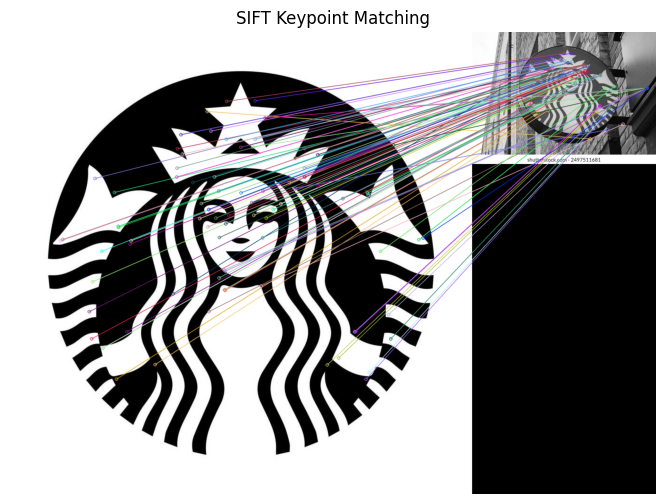

In [2]:
img1 = cv2.imread('image_1.jpg', cv2.IMREAD_GRAYSCALE)  
img2 = cv2.imread('image_2.webp', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Brute Force matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
sift_match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(12,6))
plt.imshow(sift_match_img)
plt.title('SIFT Keypoint Matching')
plt.axis('off')
plt.show()